# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,404,103,48,101,204,62,12,200,33,23,158,215,595,164,66,8,22,192,202
1,784,87,37,52,116,54,6,115,58,17,126,135,196,144,74,11,22,186,190
2,124,85,45,71,150,63,8,143,46,19,147,171,307,179,72,2,3,187,196
3,510,86,43,70,126,56,6,148,46,19,145,166,317,171,86,6,9,179,182
4,77,86,40,62,140,62,7,150,45,19,133,165,330,173,82,2,3,180,185
5,585,85,35,64,129,57,6,116,57,17,125,138,200,123,65,1,23,196,203
6,454,106,52,101,213,64,11,201,33,23,158,214,607,204,65,2,4,192,204
7,209,101,56,100,168,55,11,214,31,24,175,219,681,224,74,2,3,185,192
8,224,86,41,66,133,56,6,136,49,18,136,155,274,162,74,5,14,183,189
9,90,104,55,107,222,68,11,218,31,24,173,232,703,229,71,3,10,188,199


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,416.391621,93.752277,45.040073,82.850638,170.344262,61.646630,8.537341,170.398907,40.526412,20.692168,148.289617,189.941712,447.799636,175.428051,72.269581,6.185792,12.810565,189.023679,195.857923
std,239.452328,8.203203,6.231706,16.027790,33.187972,7.377892,4.238442,33.148737,7.726963,2.593850,14.708292,31.386807,176.369376,32.735235,7.267830,4.927402,8.917740,6.123827,7.356277
min,1.000000,73.000000,33.000000,40.000000,105.000000,47.000000,2.000000,112.000000,26.000000,17.000000,119.000000,130.000000,184.000000,112.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,206.000000,87.000000,40.000000,70.000000,142.000000,57.000000,7.000000,148.000000,33.000000,19.000000,137.000000,168.000000,323.000000,150.000000,67.000000,2.000000,6.000000,185.000000,191.000000
50%,409.000000,93.000000,44.000000,80.000000,170.000000,61.000000,8.000000,158.000000,42.000000,20.000000,146.000000,180.000000,369.000000,174.000000,71.000000,5.000000,11.000000,189.000000,197.000000
75%,620.000000,100.000000,50.000000,100.000000,195.000000,65.000000,10.000000,201.000000,46.000000,23.000000,160.000000,218.000000,604.000000,200.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,116.000000,59.000000,110.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [6]:
dataset = pd.read_csv("car_data.csv")
train_data, test_data = train_test_split(dataset, test_size=0.35)
train_data

,0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
65,66,81,43,68,125,57,8,149,46,19,146,169,323,172,83,6,18,179,184,bus
413,414,85,45,82,133,56,11,159,43,20,156,170,362,173,76,10,21,183,193,van
661,662,87,41,66,140,58,6,148,46,19,136,164,318,178,79,19,2,181,185,saab
424,425,89,36,69,142,57,7,135,50,18,126,154,266,128,66,3,36,193,203,opel
257,258,99,48,104,196,63,10,201,33,23,152,221,604,199,73,8,4,188,197,saab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,301,93,43,78,166,59,7,151,44,19,141,182,342,174,68,15,2,193,197,opel
359,360,108,52,109,182,55,12,216,31,24,171,229,687,214,72,10,28,189,201,saab
141,142,106,49,107,194,57,11,214,31,24,161,224,670,172,67,0,39,192,206,opel
785,786,107,55,103,213,68,11,219,30,25,172,221,709,216,70,10,7,187,197,saab


#### Preparations

To save columns names I read csv file again and splitted it in test and train data (same proportions as before).

What we need to do to train models from the dataset:

 - Transform van column values to integers. I need to do that cause I can only work with integers in logistic regression.
 - Delete first column, cause it represents serial number of car and doen't affect on other features. So it will be better to not us thes values, in case they will worsen results of learning.
 - Normalize the data (except integer representatives of van column).

I will fit both train data and test data. 

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

def prepare_data(dataset):
    # drop "0" column
    dataset.drop("0", axis=1, inplace=True)

    # encode "van" column values to numbrs
    encoder = LabelEncoder()
    fit_van = encoder.fit_transform(dataset["van"])
    dataset.drop("van", axis=1, inplace=True)
    
    # normalize data
    unfit_data = dataset.values
    scaler = StandardScaler().fit(unfit_data)
    fit_data = scaler.transform(unfit_data)

    # return x and y
    return fit_data, fit_van

# prepare train and test data
x_train, y_train = prepare_data(train_data.copy())
x_test, y_test  = prepare_data(test_data.copy() )

# check that results match with expected values
print(x_train.mean(), x_train.std()) # mean should be near 0, std should be 1
print(x_test.mean(),  x_test.std())

# show x_train and y_train (just to visualize results)
x_train, y_train

-1.556694012265348e-16 1.0
-7.518176938527712e-17 1.0


(array([[-1.56841256, -0.28227571, -0.85561518, ...,  0.59954675,
         -1.58838549, -1.53522283],
        [-1.07269667,  0.04125115,  0.02250717, ...,  0.92858824,
         -0.94883754, -0.33970888],
        [-0.82483873, -0.60580256, -0.98106123, ..., -1.15534118,
         -1.26861151, -1.40238795],
        ...,
        [ 1.52981173,  0.68830485,  1.59058279, ...,  2.90283717,
          0.49014536,  1.3871446 ],
        [ 1.6537407 ,  1.65888542,  1.33969069, ..., -0.6069387 ,
         -0.30928958,  0.19163065],
        [ 1.28195379,  1.17359513,  0.77518347, ..., -0.93598019,
          0.65003234, -0.60537865]]),
 array([0, 3, 2, 1, 2, 0, 2, 3, 2, 2, 0, 0, 3, 0, 2, 3, 3, 1, 3, 1, 1, 2,
        0, 0, 1, 3, 3, 1, 3, 1, 1, 1, 3, 0, 1, 3, 0, 2, 2, 3, 0, 3, 0, 3,
        3, 2, 3, 0, 1, 0, 2, 0, 1, 2, 3, 2, 2, 3, 1, 0, 2, 3, 2, 2, 0, 2,
        3, 3, 1, 3, 0, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 3, 3, 2, 1, 0,
        0, 0, 2, 0, 2, 3, 1, 0, 1, 2, 1, 2, 3, 2, 3, 1, 3, 2, 0, 1, 0, 1,
   

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# initialize model
model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

# define parameters for GridSearch
C = np.logspace(-4, 4, 15)
penalty = ['l1', 'l2']
parameters = {"C":C, "penalty":penalty}

# use Grid_Search
grid = GridSearchCV(model, parameters)
grid

GridSearchCV(estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          solver='saga', tol=0.001),
             param_grid={'C': array([1.00000000e-04, 3.72759372e-04, 1.38949549e-03, 5.17947468e-03,
       1.93069773e-02, 7.19685673e-02, 2.68269580e-01, 1.00000000e+00,
       3.72759372e+00, 1.38949549e+01, 5.17947468e+01, 1.93069773e+02,
       7.19685673e+02, 2.68269580e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

#### Preparing parameters and models

We need to find optimal hyperparameters for our model, by using mentioned default parameters and GridSearchCV()

In [9]:
# fitting the model for grid search 
grid.fit(x_train, y_train) 
 
# print best parameter after tuning 
print(f"Grid search best parameters: {grid.best_params_}")  

Grid search best parameters: {'C': 193.06977288832496, 'penalty': 'l1'}


In [10]:
from sklearn.metrics import classification_report, confusion_matrix 

# Predict test values
grid_predictions = grid.predict(x_test)

# print classification report 
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        76
           1       0.61      0.62      0.62        77
           2       0.69      0.60      0.64        80
           3       0.87      0.98      0.93        63

    accuracy                           0.77       296
   macro avg       0.77      0.78      0.78       296
weighted avg       0.77      0.77      0.77       296



#### Discuss results

We can see good results in 0 and 3 y_values, and not so good on 1 and 2.

To be clear:
 - bus  is 0
 - opel is 1
 - saab is 2
 - van  is 3

Now let's train modell with new parameters.

In [11]:
from sklearn.metrics import f1_score, accuracy_score

model_best = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C=grid.best_params_.get("C"), penalty=grid.best_params_.get("penalty"))
model_res = model_best.fit(x_train, y_train)
y_pred = model_best.predict(x_test)

print(f"accuracy: {accuracy_score (y_test, y_pred                    )}")
print(f"f1_score: {f1_score       (y_test, y_pred, average='weighted')}")

accuracy: 0.7702702702702703
f1_score: 0.7664970366462904


#### Plot

Let's plot ROC curve by using plot_roc_curve() in scikitplot.skplt.metrics

/home/bsibgatullin/anaconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


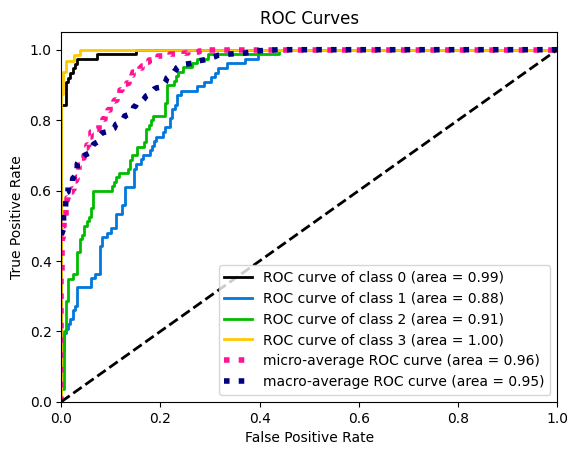

In [12]:
from scikitplot.metrics import plot_roc_curve
import matplotlib.pyplot as plt

model_best_pred = model_res.predict_proba(x_test)
plot_roc_curve(y_test, model_best_pred)
plt.show()

#### Plot results

Do not forget that:
 - bus  is 0
 - opel is 1
 - saab is 2
 - van  is 3

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

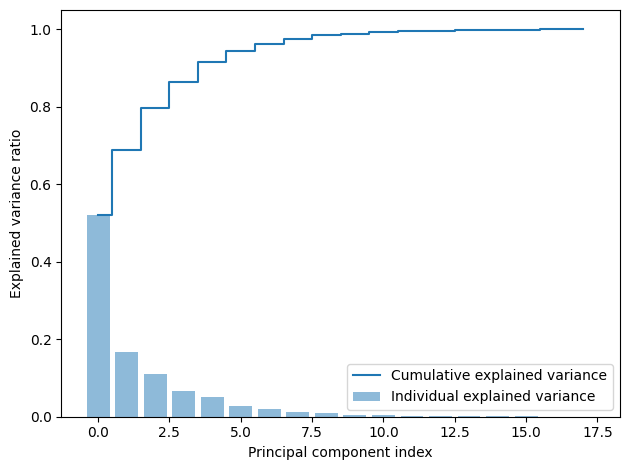

[5.21167365e-01 1.66301657e-01 1.10311432e-01 6.70105464e-02
 5.05610032e-02 2.84957469e-02 1.96017928e-02 1.21774658e-02
 8.62332779e-03 4.95830709e-03 3.44036555e-03 2.31970044e-03
 1.96752721e-03 1.18142606e-03 8.31258874e-04 6.97189127e-04
 3.34186965e-04 1.97017288e-05]


In [13]:
from sklearn.decomposition import PCA

# Code from guide https://vitalflux.com/pca-explained-variance-concept-python-example/

# Instantiate PCA
pca = PCA()

# Determine transformed features (already transformed, only using fit)
X_train_pca = pca.fit(x_train)

# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Print explained variance values
print(exp_var_pca)

#### Results

Let's use components with values greater than 1e-03: first 14 components.

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [14]:
new_pca = PCA(n_components=14)

# Fit pca
new_pca.fit(x_train)

# Transform data for new components quantity
x_train_pca = new_pca.transform(x_train)
x_test_pca  = new_pca.transform(x_test)

print(f"Test mean: {x_test_pca.mean()}, test std: {x_test_pca.std()}")
print(f"Train mean: {x_train_pca.mean()}, train std: {x_train_pca.std()}")
print(f"Test shape: {x_test_pca.shape}, train shape: {x_train_pca.shape}")

Test mean: 1.2645397384726686e-16, test std: 1.1325474181911843
Train mean: 3.697854466615145e-18, train std: 1.1328257317586274
Test shape: (296, 14), train shape: (549, 14)


#### Results

I prepared data with PCA, for 8 components as it were mentioned in previous stage.

Data was standerdized, so I could correctly use it in the future.

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

#### Plan

I will go through the same stages as in stage 1

In [15]:
# initialize model
model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

# define parameters for GridSearch
C = np.logspace(-4, 4, 15)
penalty = ['l1', 'l2']
parameters = {"C":C, "penalty":penalty}

# use Grid_Search
grid = GridSearchCV(model, parameters)
grid

GridSearchCV(estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          solver='saga', tol=0.001),
             param_grid={'C': array([1.00000000e-04, 3.72759372e-04, 1.38949549e-03, 5.17947468e-03,
       1.93069773e-02, 7.19685673e-02, 2.68269580e-01, 1.00000000e+00,
       3.72759372e+00, 1.38949549e+01, 5.17947468e+01, 1.93069773e+02,
       7.19685673e+02, 2.68269580e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [16]:
# fitting the model for grid search 
grid.fit(x_train_pca, y_train) 
 
# print best parameter after tuning 
print(f"Grid search best parameters: {grid.best_params_}")

Grid search best parameters: {'C': 3.727593720314938, 'penalty': 'l1'}


In [17]:
from sklearn.metrics import f1_score, accuracy_score

model_best = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C=grid.best_params_.get("C"), penalty=grid.best_params_.get("penalty"))
model_res = model_best.fit(x_train_pca, y_train)
y_pred = model_best.predict(x_test_pca)

print(f"accuracy: {accuracy_score (y_test, y_pred                    )}")
print(f"f1_score: {f1_score       (y_test, y_pred, average='weighted')}")

accuracy: 0.7635135135135135
f1_score: 0.7591243790934193


#### Score on test data

According to the score our predictions became a little bit worse

/home/bsibgatullin/anaconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


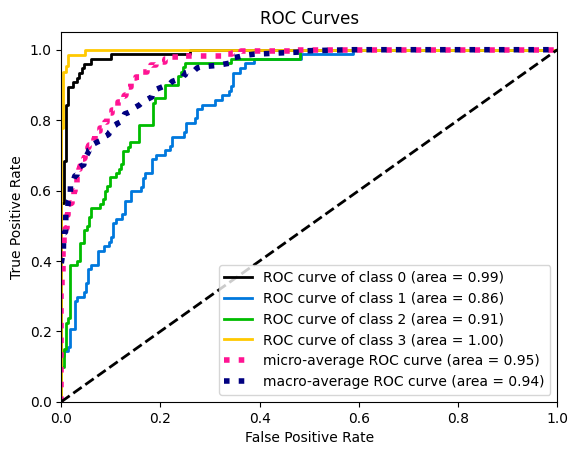

In [18]:
model_best_pred = model_res.predict_proba(x_test_pca)
plot_roc_curve(y_test, model_best_pred)
plt.show()

#### Results

Plot and score shows, that our model became worse.

Do not forget that:
 - bus  is 0
 - opel is 1
 - saab is 2
 - van  is 3

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [19]:
from sklearn.tree import DecisionTreeClassifier

# Creating depth array
parameters = {'max_depth':range(3,20)}

# Create model that will find optimal depth
clf = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=4)
clf.fit(X=x_train_pca, y=y_train)

tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.6885237698081734 {'max_depth': 9}


#### Max depth

Optimal tree depth (max_depth) is 9.

Train DecisionTree with this depth.

In [20]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=clf.best_params_.get('max depth'))

# Train Decision Tree Classifer
clf = clf.fit(x_train_pca, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test_pca)

In [21]:
print(f"Accuracy: {accuracy_score (y_test, y_pred                    )}")
print(f"f1_score: {f1_score       (y_test, y_pred, average='weighted')}")

Accuracy: 0.625
f1_score: 0.6250812455381125


#### Results

Accuracy and f1_score worse than that in 2.4 and 2.1.

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [24]:
from sklearn.ensemble import BaggingClassifier

# Create array from 2 to 100, with step 5
estimator_range = np.arange(2, 101, 5)

In [55]:
# Bagging for tree
tree_accuracy = []
tree_f1       = []

# Cycle for estimator values
for i in estimator_range:
    # Use model
    estimator_model = DecisionTreeClassifier()

    # Bootstrap sampling with replacement
    indices = np.random.choice(len(x_train_pca), len(x_train_pca), replace=True)
    x_sampled = x_train_pca[indices]
    y_sampled = y_train[indices]
    # Create baggibg classifier with chosen model as an estimator
    bagging_model = BaggingClassifier(estimator=estimator_model, n_estimators=i)
    bagging_model.fit(x_sampled, y_sampled)
    y_pred = bagging_model.predict(x_test_pca)

    # Get scores
    tree_f1.append(f1_score(y_test, y_pred, average='weighted'))
    tree_accuracy.append(accuracy_score(y_test, y_pred))

# Bagging for logistic regression
logistic_accuracy = []
logistic_f1       = []

# Cycle for estimator values
for i in estimator_range:
    # initialize model
    model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

    # define parameters for GridSearch
    C = np.logspace(-4, 4, 15)
    penalty = ['l1', 'l2']
    parameters = {"C":C, "penalty":penalty}

    # use Grid_Search
    grid = GridSearchCV(model, parameters)
    
    # fitting the model for grid search 
    grid.fit(x_train_pca, y_train) 

    # Use model
    estimator_model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C=grid.best_params_.get("C"), penalty=grid.best_params_.get("penalty"))

    # Bootstrap sampling with replacement
    indices = np.random.choice(len(x_train_pca), len(x_train_pca), replace=True)
    x_sampled = x_train_pca[indices]
    y_sampled = y_train[indices]
    # Create baggibg classifier with chosen model as an estimator
    bagging_model = BaggingClassifier(estimator=estimator_model, n_estimators=i)
    bagging_model.fit(x_sampled, y_sampled)
    y_pred = bagging_model.predict(x_test_pca)

    # Get scores
    logistic_f1.append(f1_score(y_test, y_pred, average='weighted'))
    logistic_accuracy.append(accuracy_score(y_test, y_pred))

/home/bsibgatullin/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bsibgatullin/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bsibgatullin/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bsibgatullin/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bsibgatullin/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bsibgatullin/anaconda3/lib/py

In [56]:
# Check that output make sense
tree_accuracy, logistic_accuracy

([0.5945945945945946,
  0.7128378378378378,
  0.7297297297297297,
  0.7297297297297297,
  0.7432432432432432,
  0.7195945945945946,
  0.7128378378378378,
  0.706081081081081,
  0.7567567567567568,
  0.7533783783783784,
  0.7432432432432432,
  0.7567567567567568,
  0.7432432432432432,
  0.7533783783783784,
  0.7331081081081081,
  0.7668918918918919,
  0.7567567567567568,
  0.7567567567567568,
  0.7533783783783784,
  0.7398648648648649],
 [0.7364864864864865,
  0.7668918918918919,
  0.75,
  0.7668918918918919,
  0.75,
  0.7601351351351351,
  0.75,
  0.7736486486486487,
  0.7567567567567568,
  0.7905405405405406,
  0.75,
  0.7297297297297297,
  0.7736486486486487,
  0.7668918918918919,
  0.7635135135135135,
  0.7567567567567568,
  0.7567567567567568,
  0.7601351351351351,
  0.7702702702702703,
  0.777027027027027])

<function matplotlib.pyplot.show(close=None, block=None)>

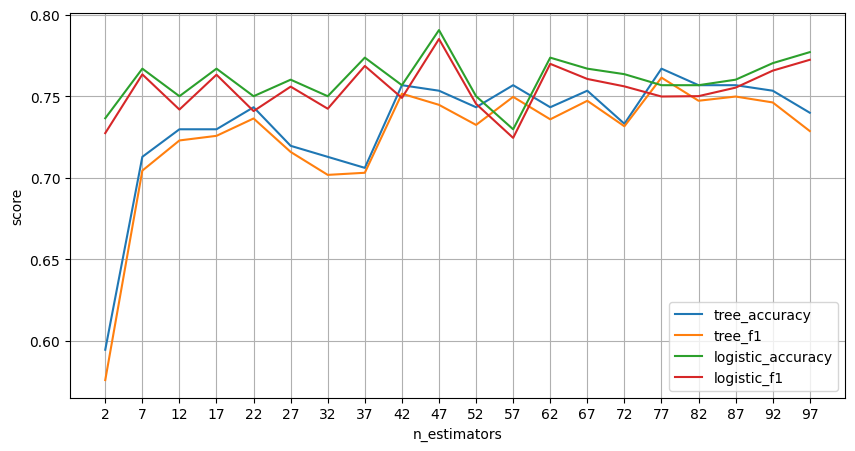

In [57]:
fig = plt.figure(figsize=[10, 5])

plt.grid(True)
plt.xlabel('n_estimators')
plt.ylabel('score'       )
plt.xticks(range(2, 100, 5))


plt.plot(estimator_range, tree_accuracy    )
plt.plot(estimator_range, tree_f1          )
plt.plot(estimator_range, logistic_accuracy)
plt.plot(estimator_range, logistic_f1      )

plt.legend(['tree_accuracy', 'tree_f1', 'logistic_accuracy', 'logistic_f1'])
plt.show

#### Results

Optimal number of estimators is 77. Because with that number we get high values for all of the scores. Logistic scores rises with the rising of estinators number. As for Tree scores, they stay almost same in the middle (47-77), but then start to fall, maybe that is because of retraining.

As for depth values (used in 2.5), I haven't used it, because bagging make retraining of decision tree, so there is no need to limit it's depth.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [52]:
from sklearn.ensemble import RandomForestClassifier

forest_f1       = []
forest_accuracy = []

# Cycle for estimator values
for i in estimator_range:
    # Bootstrap sampling with replacement
    indices = np.random.choice(len(x_train_pca), len(x_train_pca), replace=True)
    x_sampled = x_train_pca[indices]
    y_sampled = y_train[indices]

    # Create baggibg classifier with chosen model as an estimator
    random_forest = RandomForestClassifier(n_estimators=i)
    random_forest.fit(x_sampled, y_sampled)
    y_pred = random_forest.predict(x_test_pca)

    # Get scores
    forest_f1.append(f1_score(y_test, y_pred, average='weighted'))
    forest_accuracy.append(accuracy_score(y_test, y_pred))

<function matplotlib.pyplot.show(close=None, block=None)>

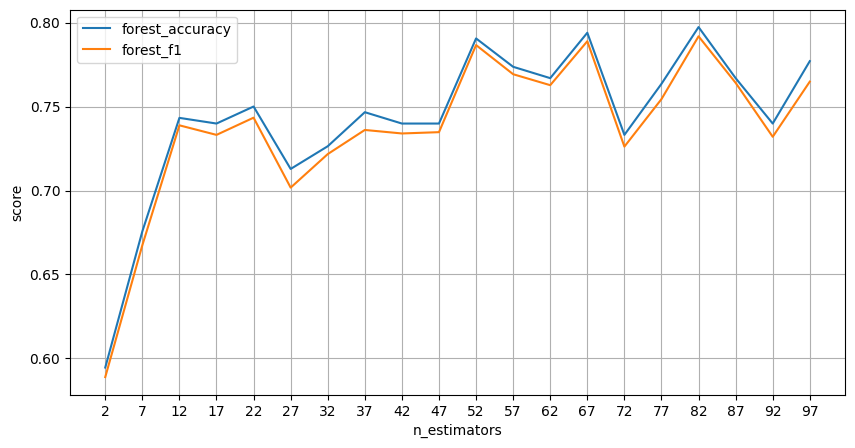

In [53]:
fig = plt.figure(figsize=[10, 5])

plt.grid(True)
plt.xlabel('n_estimators')
plt.ylabel('score'       )
plt.xticks(range(2, 100, 5))


plt.plot(estimator_range, forest_accuracy    )
plt.plot(estimator_range, forest_f1          )

plt.legend(['forest_accuracy', 'forest_f1'])
plt.show

#### Results

Best number of trees is 82.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [80]:
x_split_data = np.array_split(x_train_pca, 10)
y_split_data = np.array_split(y_train,     10)

tree_accuracy     = []
tree_f1           = []
logistic_accuracy = []
logistic_f1       = []
forest_accuracy   = []
forest_f1         = []

random_forest = RandomForestClassifier(n_estimators=82)
tree = DecisionTreeClassifier(max_depth=9)
logistic = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C=3.73, penalty='l1')

train_data_x = x_split_data[0]
train_data_y = y_split_data[0]

train_size = []

for i in range(10):
    # Concatenating arrays
    if i == 0:
        pass
    else:
        train_data_x = np.concatenate([train_data_x, x_split_data[i]], axis=0)
        train_data_y = np.concatenate([train_data_y, y_split_data[i]], axis=0)

    # Train models
    random_forest.fit(train_data_x, train_data_y)
    tree.fit(train_data_x, train_data_y)
    logistic.fit(train_data_x, train_data_y)

    # Predicting data
    rf_pred   = random_forest.predict(x_test_pca)
    tree_pred = tree.predict(x_test_pca)
    logistic_pred = logistic.predict(x_test_pca)

    # Get score info
    forest_accuracy.append  (accuracy_score(y_test, rf_pred      ))
    tree_accuracy.append    (accuracy_score(y_test, tree_pred    ))
    logistic_accuracy.append(accuracy_score(y_test, logistic_pred))
    forest_f1.append  (f1_score(y_test, rf_pred      , average='weighted'))
    tree_f1.append    (f1_score(y_test, tree_pred    , average='weighted'))
    logistic_f1.append(f1_score(y_test, logistic_pred, average='weighted'))

    # Get train size
    train_size.append(train_data_y.shape[0])

/home/bsibgatullin/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


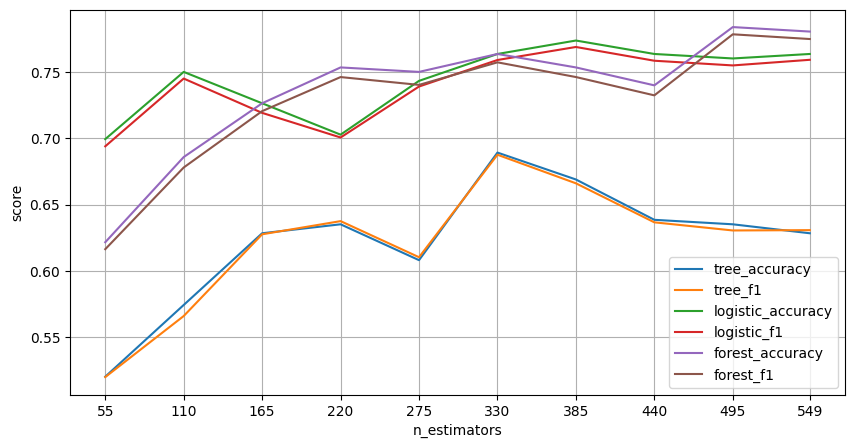

In [81]:
fig = plt.figure(figsize=[10, 5])

plt.grid(True)
plt.xlabel('n_estimators')
plt.ylabel('score'       )
plt.xticks(train_size)


plt.plot(train_size, tree_accuracy    )
plt.plot(train_size, tree_f1          )
plt.plot(train_size, logistic_accuracy)
plt.plot(train_size, logistic_f1      )
plt.plot(train_size, forest_accuracy  )
plt.plot(train_size, forest_f1        )


plt.legend(['tree_accuracy', 'tree_f1', 'logistic_accuracy', 'logistic_f1', 'forest_accuracy', 'forest_f1'])
plt.show()

#### Results

Random forest provided best results. Logistic regression and random forest showed accuracy inscreasing with data samples increasing. As for decision tree, it showed best results on 330 samples (of 549). This could mean, that we had optimal max_depth for that amount of samples.

#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.